In [1]:
import numpy as np
import mpmath as mp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

from deepburn.CRAM import CRA, CRAC
from deepburn.CRAM import cras_literature as cl

np.set_printoptions(precision=16)

In [2]:
print(cl.collection)

[('VandenEynde2021', 2), ('VandenEynde2021', 3), ('VandenEynde2021', 4), ('VandenEynde2021', 5), ('VandenEynde2021', 6), ('VandenEynde2021', 7), ('VandenEynde2021', 8), ('VandenEynde2021', 9), ('VandenEynde2021', 10), ('VandenEynde2021', 11), ('VandenEynde2021', 12), ('VandenEynde2021', 13), ('VandenEynde2021', 14), ('VandenEynde2021', 15), ('VandenEynde2021', 16), ('VandenEynde2021', 17), ('VandenEynde2021', 18), ('VandenEynde2021', 19), ('VandenEynde2021', 20), ('Calvin2021', 1), ('Calvin2021', 2), ('Calvin2021', 3), ('Calvin2021', 4), ('Calvin2021', 5), ('Calvin2021', 8), ('Calvin2021', 15), ('Calvin2021', 16), ('Pusa2012', 14), ('Pusa2012', 16), ('Zhang2020', 14)]


In [3]:
def tofloat(x):
    return np.array(x, dtype=float)

c:\Users\gvdeynde\Miniconda3\envs\deepburn\lib\site-packages\numpy\ma\core.py:6846: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


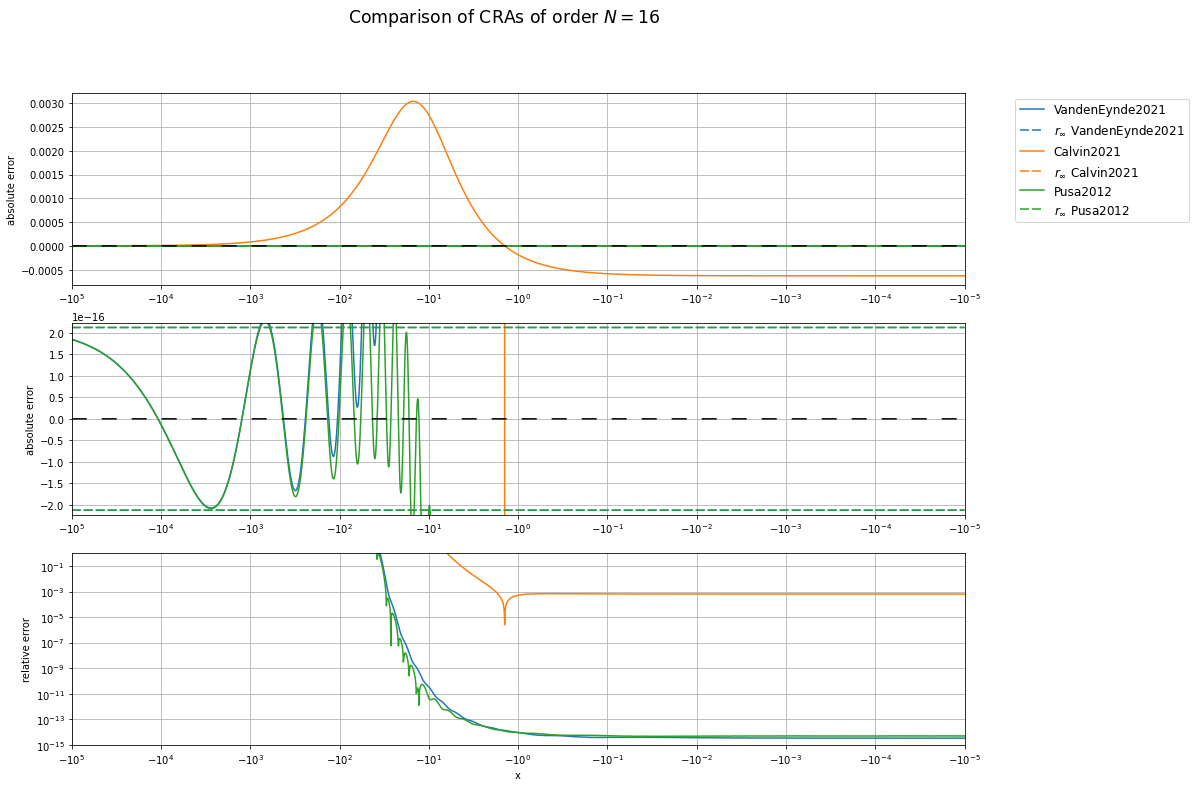

In [18]:
powers = np.linspace(5,-5,2001)
x = -np.power(10, powers)

order = 16

mpexp = np.vectorize(mp.exp)
cras = cl.by_order(order)

fig, ax = plt.subplots(3, 1, sharex=False, figsize=(16, 12))

for i, cra in enumerate(cras):
    for j in range(2):
        ax[j].plot(x, tofloat(cra.error(x, 50)), "-", color=f"C{i}", label=cra.origin)
        ax[j].plot(x, np.ones_like(x) * cra.rinf, dashes=[6, 2], color=f"C{i}", label=f"$r_\infty$ {cra.origin}")
        ax[j].plot(x, np.ones_like(x) * -cra.rinf, dashes=[6, 2], color=f"C{i}")
        #ax[j].plot(cra.extrema, cra.extremavals, 'o', color=f'C{i}')
    
    ax[2].plot(x, np.abs(cra.error(x, 50)/mpexp(x)), "-", color=f"C{i}", label=cra.origin)

for j in range(2):
    ax[j].plot(x, np.zeros_like(x), dashes=[10, 10], color="k")

    ax[j].tick_params(axis="x", which="minor", bottom=True)

    ax[j].set_ylabel("absolute error")
    ax[j].set_xscale("symlog", linthresh=1e-300)
    ax[j].set_xlim([float(x[0]),float(x[-1])])
    #ax[j].set_xlim([-10, 0])
    ax[j].grid('both')

cragvde = cl('VandenEynde2021', order)
ax[1].set_ylim([-cragvde.rinf*1.05, +cragvde.rinf*1.05])


ax[2].set_xscale("symlog", linthresh=1e-300)
ax[2].set_xlabel("x")
ax[2].set_yscale("log")
ax[2].set_ylim([1e-15, 1])
ax[2].set_xlim([float(x[0]),float(x[-1])])
ax[2].grid('both')
ax[2].set_ylabel("relative error")
fig.suptitle(f'Comparison of CRAs of order $N = {order}$', fontsize='xx-large')

ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', fontsize='large')
#plt.tight_layout()

plt.show()